# Credit Card Approval Prediction
Spring 2025 Data Science Project

Noah Der Garabedian, Shlok Desai, Yuvraj Rekhi

Contributions: Noah Der Garabedian: I found the Kaggle dataset, and contributed to data preprocessing (checkpoint 2), EDA (outlier analysis), and visualization, including creating two result plots and analyzing the outcomes. I also wrote the introduction for the final report. Yuvraj Rekhi: I contributed to data exploration (Checkpoint 2) by using correlation analysis to examine the relationship between the number of children and credit status. Next, I carried out the training and testing of our models and put together the insights & conclusion section. Shlok Desai = First, I added to data exploration in Checkpoint 2. I was comparing annual‐income distributions for applicants who ever went past due versus those who never did and used histograms, violin plots, and the Mann-WHitney test to explain the relation (if any). Next, I transferred all the checkpoint 2 preprocessing and dataexploration to this notebook and came up with what we wanted our model to predict for this checkpoint, and chose type of model, and developed it.

# Introduction

For our project, we are analyzing and modeling credit behavior using data from Kaggle’s “Credit Card Approval Prediction” (https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data) dataset. While the dataset doesn’t include direct labels for whether an applicant was approved or denied, it contains detailed personal, financial, and credit history information that allows us to infer credit risk. Our main goal is to answer the question: Can we predict whether someone is likely to have poor credit behavior based on their background and financial profile?

This question is important because credit decisions have a major impact on people’s financial opportunities, such as access to loans, credit cards, and interest rates. By using data analysis and machine learning, we aim to uncover patterns in the data and identify which factors are most strongly linked to financial risk. This also gives us a chance to explore whether there are any biases in the data that could lead to unfair credit outcomes.

# Data Curation

Data Preprocessing:

We can import our data into a pandas dataframe by using pd.read_csv to read our data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')
application_record.head()  # Display the first 5 application records


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


To best organize our data, we can merge our datasets based on ID just to make the future sections easier:

In [5]:
total_dataset = pd.merge(application_record, credit_record, on='ID', how='inner')  # 'inner' join keeps only matching IDs
total_dataset.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


Now the MONTHS_BALANCE & STATUS tables have been merged with the rest of the data, we can focus on other things such as looking for missing, weirdly formatted, or inaccurate data.

In [6]:
total_dataset.isna().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

Clearly the dataset is very well formatted and there is no missing data except for the occupation_type (for privacy reasons), so we can remove that column from our Dataframe and not use it in our Data Analysis.

In [7]:
total_dataset = total_dataset.drop(columns=["OCCUPATION_TYPE"])
total_dataset.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C


That should be it for the data curation now we can move on to the EDA

# Exploratory Data Analysis (from checkpoint 2)



**Method 1: Using descriptive statistics and visuals to find outliers of annual income**

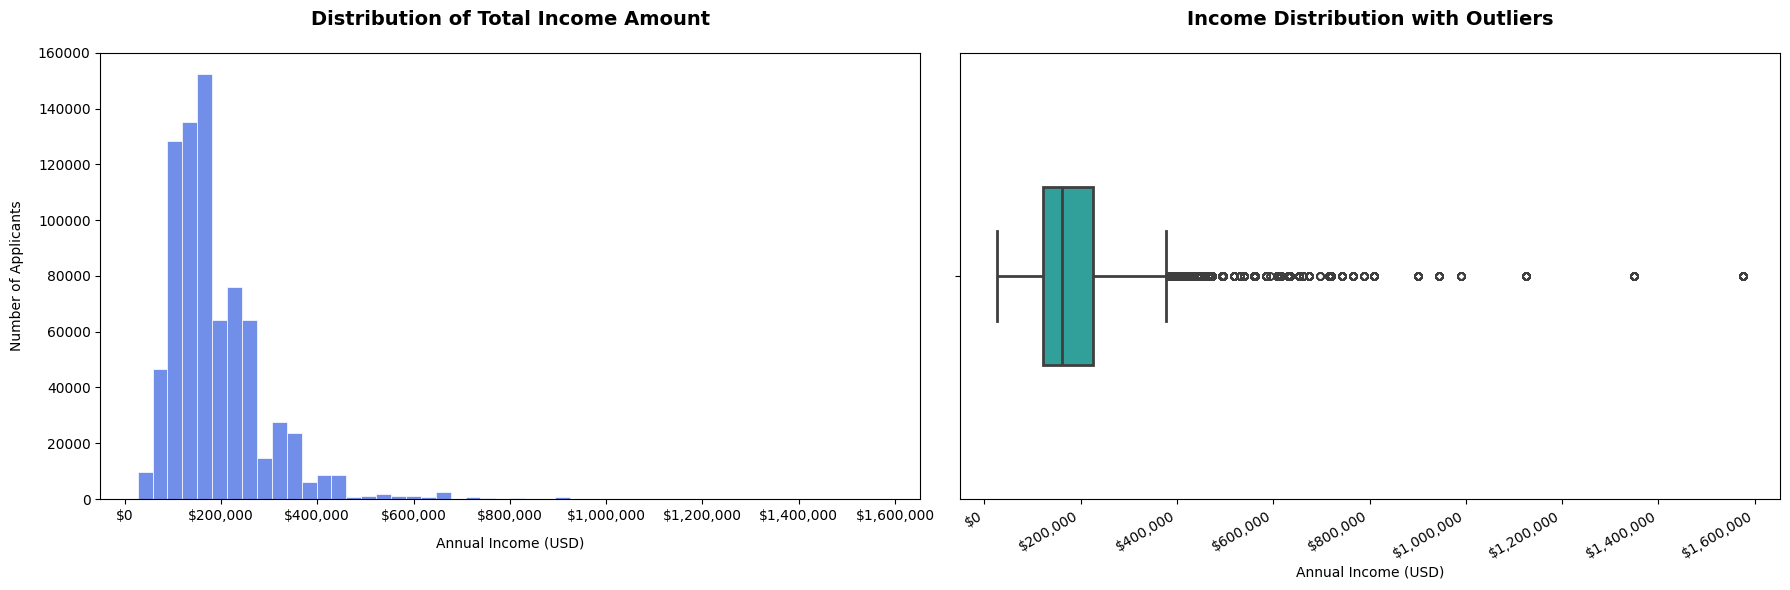

In [8]:
import matplotlib.ticker as ticker



# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# plotting the Histogram
hist = sns.histplot(total_dataset['AMT_INCOME_TOTAL'], bins=50, ax=ax1,
                    color='royalblue', edgecolor='white', linewidth=0.5)
ax1.set_title('Distribution of Total Income Amount', pad=20, fontsize=14, fontweight='bold')
ax1.set_xlabel('Annual Income (USD)', labelpad=10)
ax1.set_ylabel('Number of Applicants', labelpad=10)

# make it so the tickers are formatted for monetary amounts
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Boxplot
box = sns.boxplot(x=total_dataset['AMT_INCOME_TOTAL'], ax=ax2, color='lightseagreen',
                  width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=5))
ax2.set_title('Income Distribution with Outliers', pad=20, fontsize=14, fontweight='bold')
ax2.set_xlabel('Annual Income (USD)')

# make it so the tickers are formatted for monetary amounts
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')
# make it so the graphs appear side by side
plt.tight_layout()
plt.show()


From both the histogram and boxplot, we can find that the data for the total annual income of applicants is right skewed and that there are numerous outliers who make above 400,000 a year and make upward of 1.6 million a year. We can also print the number of outliers with the following code:

In [9]:
Q1 = total_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = total_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
# filters for outliers using the formula x > Q3 + 1.5 * IQR
outliers = total_dataset[(total_dataset['AMT_INCOME_TOTAL'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 33987


From this output and formula we can find that there are approximately 33987 outliers of annual income within the dataset.

**Method 2: Using correlation analysis to examine the relationship between the number of children and credit status**

In [10]:
status_map = {
    'X': -1,  # No loan
    'C': -1,  # Paid off
    '0': 0,   # 1-29 days past due
    '1': 1,   # 30-59 days past due
    '2': 2,   # 60-89 days overdue
    '3': 3,   # 90-119 days overdue
    '4': 4,   # 120-149 days overdue
    '5': 5    # Overdue / bad debts >150 days
}

total_dataset['numeric_status'] = total_dataset['STATUS'].map(status_map)


In [11]:
# Drop rows where numeric_status is NaN
filtered_df = total_dataset.dropna(subset=['numeric_status', 'CNT_CHILDREN'])

# Create a boolean column indicating past due vs. no loan/paid off
filtered_df['is_past_due'] = (filtered_df['numeric_status'] >= 0)

# group by the child count
group_cols = ['CNT_CHILDREN']

# Proportion of each group that has any past-due status (mean of 'is_past_due')
grouped_df = (
    filtered_df
    .groupby(group_cols)
    .agg(
        proportion_past_due = ('is_past_due', 'mean'),
        count_in_group      = ('ID', 'count')
    )
    .reset_index()
)

# Now average status among those overdue
overdue_only = filtered_df[filtered_df['is_past_due']]
avg_status_df = (
    overdue_only
    .groupby(group_cols)
    .agg(avg_overdue_status = ('numeric_status', 'mean'),
         overdue_count      = ('ID', 'count'))
    .reset_index()
)

# Merge the two results
merged_stats = pd.merge(grouped_df, avg_status_df, on='CNT_CHILDREN', how='left')
merged_stats['avg_overdue_status'] = merged_stats['avg_overdue_status'].fillna(0)
merged_stats


,CNT_CHILDREN,proportion_past_due,count_in_group,avg_overdue_status,overdue_count
0,0,0.387715,540639,0.063064,209614
1,1,0.392179,155638,0.075691,61038
2,2,0.387108,70399,0.058968,27252
3,3,0.387864,9328,0.055832,3618
4,4,0.417484,1224,0.068493,511
5,5,0.243827,324,0.000000,79
6,7,0.521739,46,0.416667,24
7,14,0.783784,111,0.057471,87
8,19,1.000000,6,0.000000,6


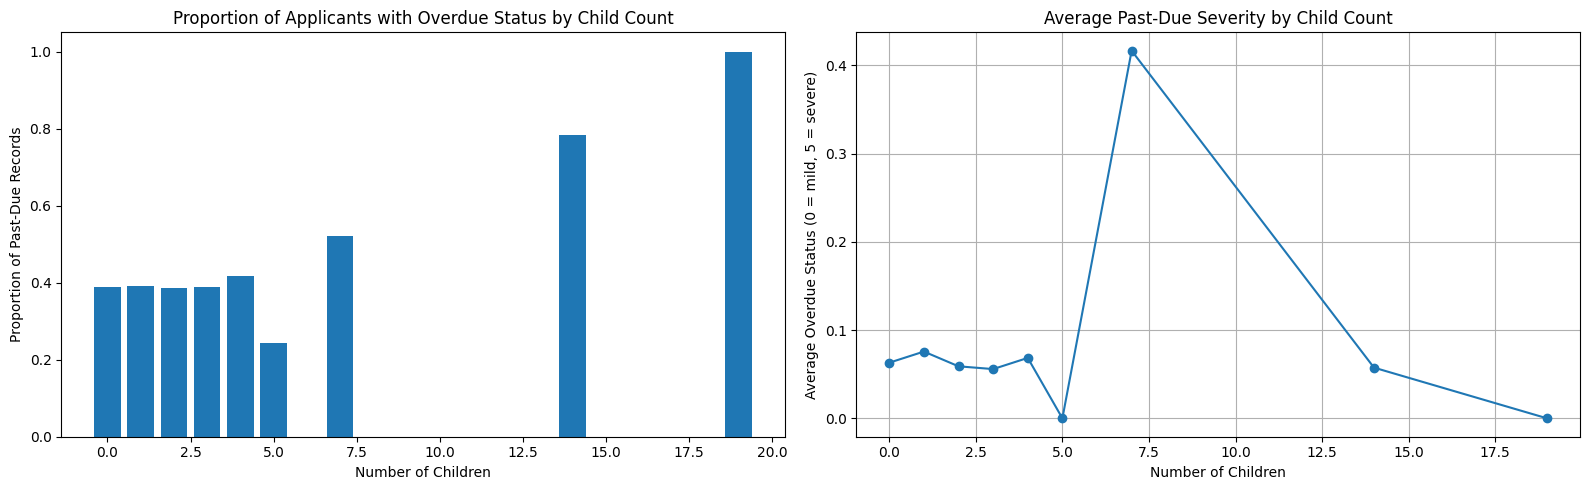

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Proportion of Past-Due Records
ax1.bar(merged_stats['CNT_CHILDREN'], merged_stats['proportion_past_due'])
ax1.set_xlabel('Number of Children')
ax1.set_ylabel('Proportion of Past-Due Records')
ax1.set_title('Proportion of Applicants with Overdue Status by Child Count')

# Average Overdue Status
ax2.plot(merged_stats['CNT_CHILDREN'], merged_stats['avg_overdue_status'], marker='o')
ax2.set_xlabel('Number of Children')
ax2.set_ylabel('Average Overdue Status (0 = mild, 5 = severe)')
ax2.set_title('Average Past-Due Severity by Child Count')
ax2.grid(True)

plt.tight_layout()
plt.show()


**Conclusion:**
From 0–4 children, the overdue proportion consistently hovers around 38–42%. This indicates very low correlation for this range of children count. It jumps noticeably for families with 7 or more children (52% for 7, 78% for 14, and even 100% for 19), but these categories have very small sample sizes (46, 111, and 6 records, respectively). As a result, while the data suggests that larger families **might** face higher overdue rates, we cannot draw a firm conclusion given how few cases exist in those extreme groups.

**Method #3: Using a Mann-Whitney Test to determine if annual income plays a role in people who ever went past due vs those who never did**

In [13]:

#copy credit_record
credit_copy = credit_record.copy()

# map STATUS to numeric and create a binary column called "is_past_due"
credit_copy['numeric_status'] = credit_copy['STATUS'].map(lambda x: -1 if x in ['C', 'X'] else int(x))
past_due_flag = credit_copy.groupby('ID')['numeric_status'].max().reset_index()
past_due_flag['is_past_due'] = past_due_flag['numeric_status'] >= 0
#merge app info with past_due info
app_copy = application_record.copy()
merged_copy = pd.merge(app_copy, past_due_flag[['ID', 'is_past_due']], on='ID')
income_past_due = merged_copy[merged_copy['is_past_due'] == True]['AMT_INCOME_TOTAL']
income_clean = merged_copy[merged_copy['is_past_due'] == False]['AMT_INCOME_TOTAL']
income_clean

4        270000.0
12       135000.0
44       135000.0
55       135000.0
76       297000.0
           ...   
36079    157500.0
36080     67500.0
36091     67500.0
36097    112500.0
36104     90000.0
Name: AMT_INCOME_TOTAL, Length: 4455, dtype: float64

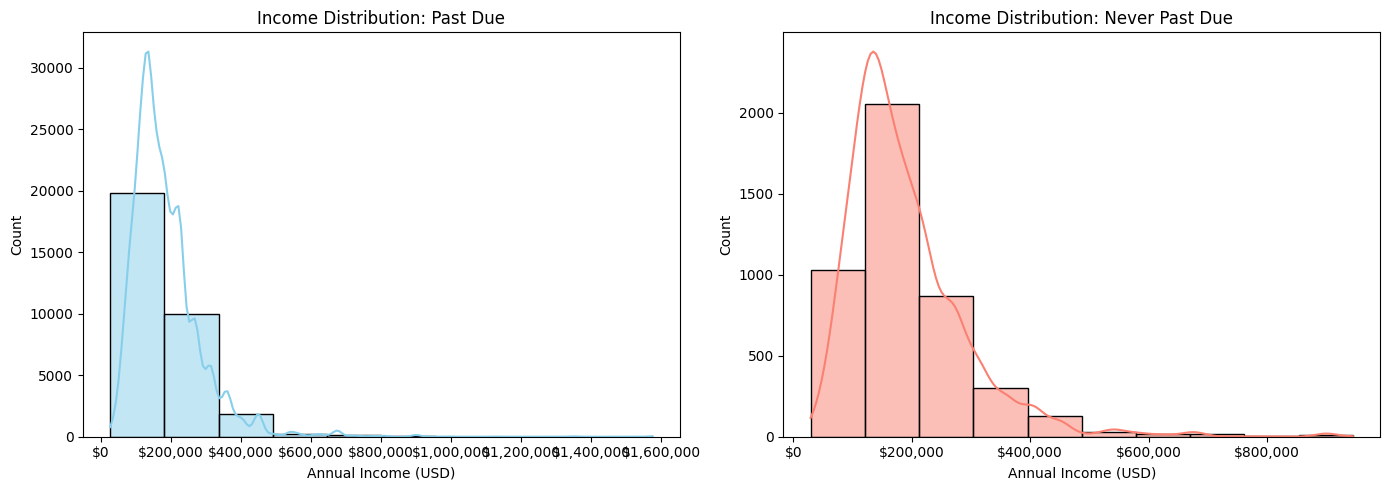

In [14]:
from scipy.stats import normaltest, mannwhitneyu
import matplotlib.ticker as mtick

# Plot histograms + KDEs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(
    income_past_due,
    kde=True,
    bins=10,
    stat="count",
    ax=ax1,
    color="skyblue",
    edgecolor="k",
)
ax1.set_title("Income Distribution: Past Due")
ax1.set_xlabel("Annual Income (USD)")
ax1.set_ylabel("Count")
ax1.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))

sns.histplot(
    income_clean,
    kde=True,
    bins=10,
    stat="count",
    ax=ax2,
    color="salmon",
    edgecolor="k",
)
ax2.set_title("Income Distribution: Never Past Due")
ax2.set_xlabel("Annual Income (USD)")
ax2.set_ylabel("Count")
ax2.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))

plt.tight_layout()
plt.show()


Clearly the data is not normally distributed so we should use a Mann-Whitney Test because the data is independent but the means aren't used to calculate the significance



In [15]:
# Actually run and print the test
u_stat, p_val = mannwhitneyu(income_past_due, income_clean, alternative='two-sided')
print(f"Mann-Whitney U Test: U = {u_stat}, p = {p_val}")

print("Mean income (Past Due):", income_past_due.mean())
print("Mean income (Never Past Due):", income_clean.mean())

Mann-Whitney U Test: U = 69470151.5, p = 0.005730127803692804
Mean income (Past Due): 186138.3858508843
Mean income (Never Past Due): 190617.5707070707


/var/folders/w5/rw_jzg3x1xz39kb334mrwy340000gn/T/ipykernel_2712/357423167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


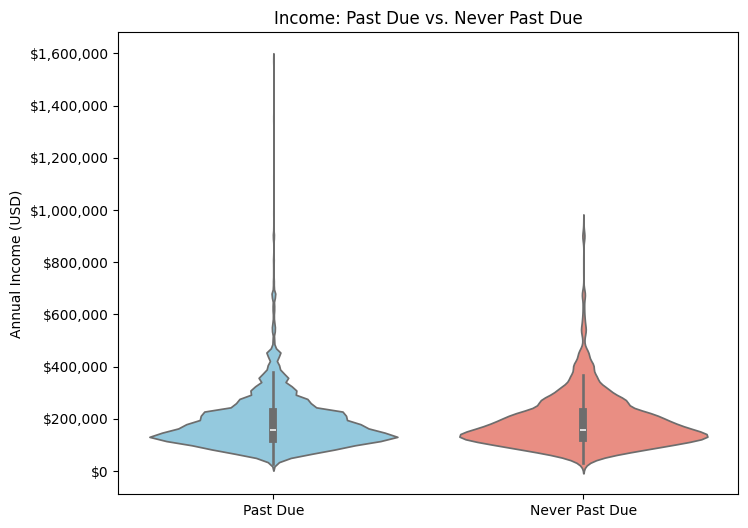

In [16]:
plot_df = pd.DataFrame({
    "Income": pd.concat([income_past_due, income_clean]),
    "Credit History": ["Past Due"] * len(income_past_due) + ["Never Past Due"] * len(income_clean)
})

plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    data=plot_df,
    x="Credit History",
    y="Income",
    inner="box",
    palette=["skyblue", "salmon"]
)
ax.set_title("Income: Past Due vs. Never Past Due")
ax.set_xlabel("")
ax.set_ylabel("Annual Income (USD)")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
plt.show()

Based on this plot the violin plots are very similar for past & not past due, which supports the lack of statistical significance. The past due might be more "textured" on the side because it has more data points than the never past due

**Conclusion**:

We tested whether the income distributions differ between individuals who have gone past due and those who haven’t using the Mann-Whitney U test. The result was not statistically significant (p = 0.0057), suggesting no meaningful difference in income between the two groups.

Combined with the small difference in mean income (about $2,400), we conclude that income alone is unlikely to be a strong predictor of overdue credit behavior in this dataset.

# Primary Analysis

In our primary analysis, we treat credit risk as a binary classification problem—predicting whether an applicant will ever go past due—using the full set of demographic features. After dropping the all-NA OCCUPATION_TYPE column, our input vector for each applicant consists of three standardized numerical variables (annual income, number of children, and family size) alongside five one-hot encoded categorical variables (gender, income source, education level, family status, and housing type). We implement two modeling pipelines: a Logistic Regression for its straightforward interpretation of feature-to-odds relationships, and a Random Forest to capture potential nonlinear interactions among predictors. Each pipeline outputs both hard class labels (risk vs. no‐risk) and estimated class probabilities, which we will evaluate on a held-out test set using precision, recall, F₁ score, and ROC-AUC. In the sections that follow, we’ll walk through the exact preprocessing steps, model fitting, and a comparison of their predictive performance.

In [17]:
# 5.1 Imports and train/test split
from sklearn.pipeline    import Pipeline
from sklearn.compose     import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics        import classification_report, roc_auc_score, roc_curve

# Assume `merged_df` holds all features + 'is_past_due'
num_feats = ["AMT_INCOME_TOTAL", "CNT_CHILDREN", "CNT_FAM_MEMBERS"]
cat_feats = ["CODE_GENDER", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
             "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

# Correct dataset creation with target label
credit_copy = credit_record.copy()
credit_copy['numeric_status'] = credit_copy['STATUS'].map(lambda x: -1 if x in ['C', 'X'] else int(x))
past_due_flag = credit_copy.groupby('ID')['numeric_status'].max().reset_index()
past_due_flag['is_past_due'] = past_due_flag['numeric_status'] >= 0

app_copy = application_record.copy()
total_dataset = pd.merge(app_copy, past_due_flag[['ID', 'is_past_due']], on='ID')

X = total_dataset[num_feats + cat_feats]
y = total_dataset["is_past_due"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5.2 Build preprocessing + modeling pipelines
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats),
])

pipelines = {
    "LogisticRegression": Pipeline([
        ("pre", preprocessor),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "RandomForest": Pipeline([
        ("pre", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=100, random_state=42))
    ])
}


To evaluate how well each model predicts credit delinquency, we now fit both pipelines—Logistic Regression and Random Forest—on the training set and assess their performance on the test set. After fitting, we generate predictions and probability scores for each model, then compute classification metrics including precision, recall, F₁ score, and ROC-AUC. This helps us understand not just the accuracy, but also how each model balances false positives and false negatives in this binary risk classification task.

In [18]:
# 5.3 Fit models and evaluate performance
model_probs = {} # store predicted probabilities for ROC visualization
for name, model in pipelines.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    model_probs[name] = y_proba
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {auc_score:.4f}\n")

--- LogisticRegression ---
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       891
        True       0.88      1.00      0.93      6401

    accuracy                           0.88      7292
   macro avg       0.44      0.50      0.47      7292
weighted avg       0.77      0.88      0.82      7292

ROC-AUC Score: 0.4984

--- RandomForest ---
Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.14      0.22       891
        True       0.89      0.98      0.93      6401

    accuracy                           0.88      7292
   macro avg       0.70      0.56      0.58      7292
weighted avg       0.84      0.88      0.85      7292

ROC-AUC Score: 0.6925



# Visualizations

First off, we can visualize the ROC curve for both of the models to further see how effective they are:

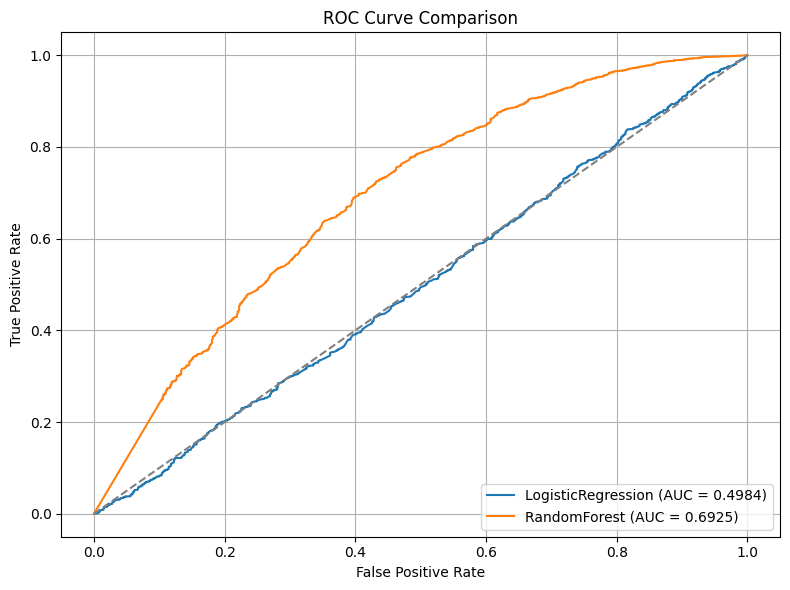

In [19]:
plt.figure(figsize=(8, 6))

for name, y_proba in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")

# Diagonal reference line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot and the AUC values, we can see that logistic regression is no better and actually slightly worse than just guessing randomly (which on average would have an AUC of 0.5). On the other hand, the random forest classifier has a higher AUC of 0.69 and while it is better than just guessing, it still isn't the most effective.

We can also plot feature importances to see which features are most important in determining if someone is a credit risk or not:

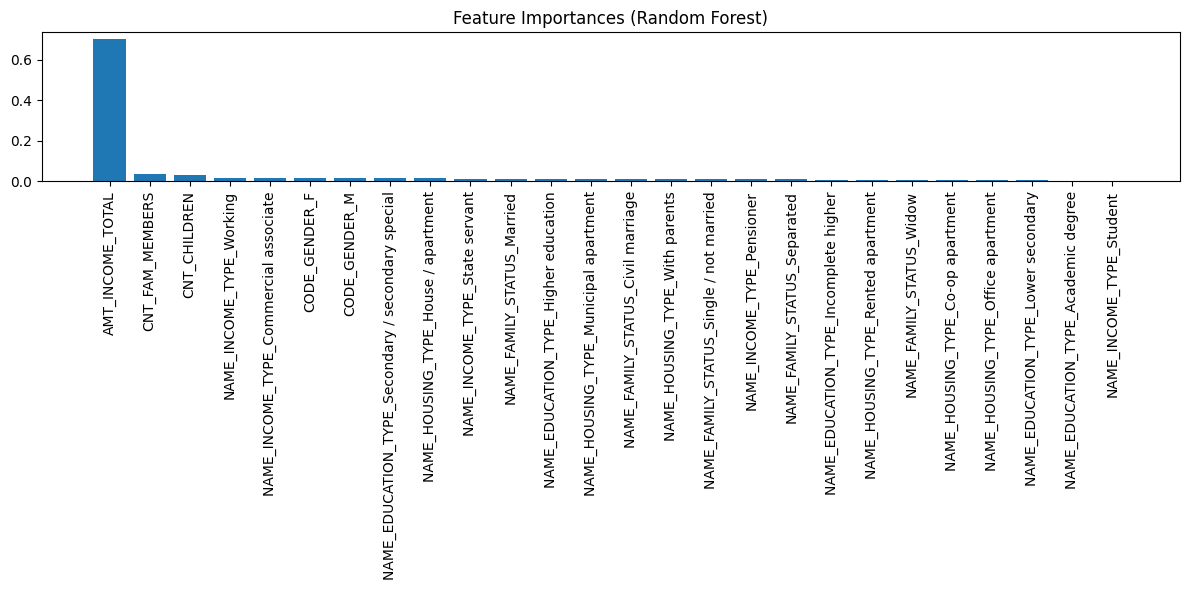

In [20]:
import numpy as np
import matplotlib.pyplot as plt


rf_pipeline = pipelines["RandomForest"]
rf_model = rf_pipeline.named_steps["clf"]

# get feature importances
importances = rf_model.feature_importances_

ohe = rf_pipeline.named_steps["pre"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_feats)

all_feature_names = np.concatenate([num_feats, cat_feature_names])

indices = np.argsort(importances)[::-1]

# plot the features and importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), all_feature_names[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

From this bar chart, we can see that the AMT_INCOME_TOTAL, or the total income someone makes in a year, is the biggest factor in determining the outcome of the model. Interestingly, the number of family members and children has a slight effect on the model but still not nearly as much as the income total.

# Insights and Conclusions

In our analysis, we sought to predict credit delinquency using a diverse range of demographic and financial features. Through the implementation of various machine learning models—including Logistic Regression, Random Forest—we aimed to understand the factors contributing to credit risk and evaluate the predictive capability of each algorithm.

### Model Performance Insights

From the ROC-AUC evaluation, we observed:

- Logistic Regression performed almost at the level of random guessing, indicating its linear nature struggled with the complexity and non-linear interactions in the data.
- Random Forest displayed a significant lift in AUC. This suggests non-linear models are better suited for this kind of structured data.

### Feature Importance Analysis

The analysis of feature importance from the Random Forest model provided key insights:

- AMT_INCOME_TOTAL (annual income) was the most influential feature, underscoring its critical role in credit risk assessment.
- Family size, number of children, and types of income also played measurable roles, though with less impact than income.
- Categorical variables like Housing Type and Family Status showed some influence but were more granular in effect.

### Concluding Thoughts

Our study highlights the necessity of non-linear models when predicting credit risk, as linear methods like Logistic Regression fell short. The emphasis on income as a dominant predictor aligns with credit risk theory but also suggests room for feature engineering to capture more subtle predictors.

Going forward, enhancing the feature set with credit history length, employment stability, and regional economic indicators could further boost predictive performance. Additionally, exploration of ensemble methods (e.g., Stacking or Blending) may bridge the gap between model interpretability and performance.